# Spectral similarity visualisation

In [19]:
%load_ext autoreload
%autoreload 2

# general
import numpy as np
import pandas as pd

# custom
from reflectance import spectrum_utils, plotting

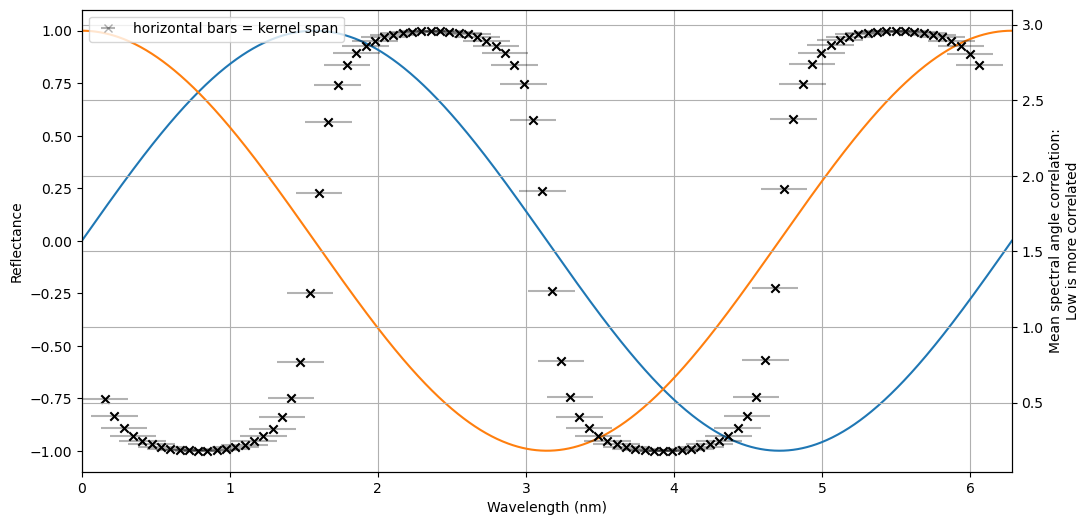

In [22]:
### Spectral angle
# checking that spectral angle calculation/plot is correct
xs = np.linspace(0, 2*np.pi, 1000)

kernel_width = 0.1*np.pi
kernel_displacement = 0.02*np.pi

curve_dict = {
    'sin': pd.Series(np.sin(xs), index=xs),
    # 'sin2': pd.Series(10*np.sin(xs), index=xs),
    'cos': pd.Series(np.cos(xs), index=xs),
}

wv_pairs, mean_corrs = spectrum_utils.calc_rolling_similarity(xs, np.array([curve_dict[k].values for k in curve_dict.keys()]), kernel_width, kernel_displacement, spectrum_utils.spectral_angle)

plotting.plot_rolling_spectral_similarity(wv_pairs, mean_corrs, xs, curve_dict.values())


# Change in similarity with parameters

In [1]:
n_samples = 100
max_depth = 10
depths = np.linspace(0, max_depth, n_samples)
coral_props = np.linspace(0, 1, n_samples)
angles = np.zeros((len(depths), len(coral_props)))

Rb_values = (1, 0, 0, 0)    # algae, CCA, coral, sand

# TODO: fix edge cases
for i, Rb2 in enumerate(coral_props):
    surface_spectrum = spectrum_utils.sub_surface_reflectance_Rb(wvs, four_endmember_array, bb, K, 0, AOP_args, *Rb_values)
    for j, H in enumerate(depths):
        retrieved_spectrum = spectrum_utils.sub_surface_reflectance_Rb(wvs, four_endmember_array, bb, K, H, AOP_args, *Rb_values)
        angle = spectrum_utils.spectral_angle(retrieved_spectrum, surface_spectrum)
        if angle == np.nan or not angle:
            angle = np.nan
        angles[i, j] = np.degrees(angle)


plt.imshow(angles, cmap='jet')
plt.ylabel("Coral Proportion")
plt.xlabel("Depth")
plt.colorbar(label="Spectral Angle (degrees)")
# set x and y ticks to actual values
plt.yticks(np.linspace(0, n_samples, 5), np.round(np.linspace(0, 1, 5), 2))
plt.xticks(np.linspace(0, n_samples, 5), np.round(np.linspace(0, 10, 5), 2));

NameError: name 'np' is not defined